# **Assignment 2**

# Analysis Goals For Normalised Datasets

The datasets being used here is the clean_data which was min-max normalised between 0 and 1 from Assignment 1.

The objective of this analysis is to investigate the relationship between weather variables and collision frequency in New York City using normalised datasets. The specific goals are as follows:

Build Linear Regression Models:

*   Develop linear regression models using each normalised dataset to predict collision frequency.
*   Train and test the models using separate test data to assess their efficacy.


Develop DNN Regression Models:

*   Implement deep neural network (DNN) regression models using each normalised dataset.
*   Train and evaluate the DNN models to analyse their performance compared to linear regression models.


Evaluate Model Performance:



*   Assess the performance of each model by calculating relevant performance metrics such as mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE).
*   Compare the performance of models trained on different normalised datasets to identify the impact of normalisation on model efficacy.


Conduct a Comparative Analysis:



*   Analyse and interpret the results of linear regression and DNN models trained on each dataset.
*   Determine the effectiveness of different normalisation strategies in predicting collision frequency and understanding the underlying relationships between weather variables and accidents.


By accomplishing these goals, the aim is to gain insights into the roles of weather variables in influencing collision frequency and assess the suitability of different modelling approaches for predicting accidents based on the normalised datasets.

# **Imports**

In [273]:
# imports the pandas library
import pandas as pd

# imports the numpy library
import numpy as np

# imports tensorflow
import tensorflow as tf

from tensorflow.python import keras
from tensorflow.python.keras import layers

print(tf.__version__)

# imports the matplotlib library
import matplotlib.pyplot as pp
test_results = {}

2.15.0


In [ ]:
def plot_loss(history):
  pp.plot(history.history['loss'], label = 'loss')
  pp.plot(history.history['val_loss'], label = 'val_loss')
  pp.ylim([0,1])
  pp.xlabel('Epoch')
  pp.ylabel('Error [NC]')
  pp.legend()
  pp.grid(True)

The below CSV files are different datasets that were normalised. The first dataset has all variables normalised, the second dataset has only the collisions normalised, and the third dataset has only the weather variables normalised.

Dataframe 1

In [ ]:
# creates data frame from CSV file
df_1 = pd.read_csv('https://raw.githubusercontent.com/HarrisMoff/15026015_DataAnalytics/main/Assignment%202/assignment_2_normalised_dataset_1.csv', index_col=0, )
df_1[:6]

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
1,0.166667,0.857143,0.0,0.033333,2018-01-02,0.111950,0.000869,0.716567,1.000000,0.296000,0.309524,0.299475,0.000000,0.093333,0.0,0,0.478931
2,0.000000,0.857143,0.0,0.000000,2018-01-01,0.046541,0.000620,0.662675,1.000000,0.352000,0.264286,0.194396,0.036585,0.093333,0.0,0,0.272354
3,0.666667,0.285714,0.0,0.766667,2014-01-24,0.113208,0.000620,0.666667,1.000000,0.266667,0.211905,0.155867,0.060976,0.146667,0.0,0,0.531346
4,0.500000,0.428571,0.0,0.233333,2015-01-08,0.091824,0.000430,0.672655,0.989362,0.346667,0.333333,0.278459,0.109756,0.108000,0.0,0,0.395683
5,0.833333,0.857143,0.0,0.166667,2018-01-06,0.093082,0.000650,0.489022,1.000000,0.549333,0.500000,0.437828,0.109756,0.172000,0.0,0,0.422405
6,0.333333,0.428571,0.0,0.200000,2015-01-07,0.211321,0.001689,0.455090,0.936170,0.274667,0.452381,0.383538,0.109756,0.254667,0.0,0,0.359712


In [ ]:
df_1.describe()

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.506469,0.519733,0.502802,0.492865,0.537917,0.005258,0.531366,0.814820,0.274868,0.306724,0.233546,0.468071,0.577852,0.045107,0.220890,0.416053
std,0.332651,0.311973,0.341247,0.289246,0.176948,0.023839,0.162548,0.233014,0.114686,0.128377,0.130638,0.169690,0.191883,0.102554,0.414965,0.107209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.285714,0.181818,0.233333,0.408805,0.003515,0.432635,0.680851,0.202667,0.211905,0.140105,0.341463,0.438667,0.000000,0.000000,0.342240
50%,0.500000,0.571429,0.454545,0.500000,0.523270,0.004727,0.526946,0.925532,0.265333,0.285714,0.210158,0.462195,0.558667,0.002660,0.000000,0.416238
75%,0.833333,0.857143,0.818182,0.733333,0.676730,0.006006,0.640719,1.000000,0.330667,0.357143,0.299475,0.596341,0.734667,0.034574,0.000000,0.484070
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is the second dataset which has only the NUM_COLLISIONS column normalised

**Dataframe 2**

In [ ]:
# creates data frame from CSV file
df_2 = pd.read_csv('https://raw.githubusercontent.com/HarrisMoff/15026015_DataAnalytics/main/Assignment%202/assignment_2_normalised_dataset_2.csv', index_col=0, )
df_2[:6]

,NUM_COLLISIONS,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1,0.478931,2,2018,1,2,2018-01-02,14.7,2.0,1024.9,10.0,12.9,20.0,31.1,18.0,5.0,0.0,0
2,0.272354,1,2018,1,1,2018-01-01,9.5,-0.5,1022.2,10.0,15.0,18.1,25.1,21.0,5.0,0.0,0
3,0.531346,5,2014,1,24,2014-01-24,14.8,-0.5,1022.4,10.0,11.8,15.9,22.9,23.0,9.0,0.0,0
4,0.395683,4,2015,1,8,2015-01-08,13.1,-2.4,1022.7,9.9,14.8,21.0,29.9,27.0,6.1,0.0,0
5,0.422405,6,2018,1,6,2018-01-06,13.2,-0.2,1013.5,10.0,22.4,28.0,39.0,27.0,10.9,0.0,0
6,0.359712,3,2015,1,7,2015-01-07,22.6,10.2,1011.8,9.4,12.1,26.0,35.9,27.0,17.1,0.0,0


In [ ]:
df_2.describe()

,NUM_COLLISIONS,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.416053,4.038813,2015.638128,6.530822,15.785959,48.564384,45.911416,1015.621461,8.259304,12.107534,19.882420,27.335502,56.381792,41.338927,0.169600,0.220890
std,0.107209,1.995907,2.183811,3.753722,8.677374,14.067346,238.545749,8.143661,2.190328,4.300715,5.391839,7.459443,13.914542,14.391218,0.385601,0.414965
min,0.000000,1.000000,2012.000000,1.000000,1.000000,5.800000,-6.700000,989.000000,0.600000,1.800000,7.000000,14.000000,18.000000,-2.000000,0.000000,0.000000
25%,0.342240,2.000000,2014.000000,3.000000,8.000000,38.300000,28.475000,1010.675000,7.000000,9.400000,15.900000,22.000000,46.000000,30.900000,0.000000,0.000000
50%,0.416238,4.000000,2016.000000,6.000000,16.000000,47.400000,40.600000,1015.400000,9.300000,11.750000,19.000000,26.000000,55.900000,39.900000,0.010000,0.000000
75%,0.484070,6.000000,2018.000000,10.000000,23.000000,59.600000,53.400000,1021.100000,10.000000,14.200000,22.000000,31.100000,66.900000,53.100000,0.130000,0.000000
max,1.000000,7.000000,2019.000000,12.000000,31.000000,85.300000,9999.900000,1039.100000,10.000000,39.300000,49.000000,71.100000,100.000000,73.000000,3.760000,1.000000


This is the third dataset which has only the weather variables normalised

**Dataframe 3**

In [ ]:
# creates data frame from CSV file
df_3 = pd.read_csv('https://raw.githubusercontent.com/HarrisMoff/15026015_DataAnalytics/main/Assignment%202/assignment_2_normalised_dataset_3.csv', index_col=0, )
df_3[:6]

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,day,year,mo,da,collision_date,NUM_COLLISIONS
1,0.111950,0.000869,0.716567,1.000000,0.296000,0.309524,0.299475,0.000000,0.093333,0.0,0,2,2018,1,2,2018-01-02,654
2,0.046541,0.000620,0.662675,1.000000,0.352000,0.264286,0.194396,0.036585,0.093333,0.0,0,1,2018,1,1,2018-01-01,453
3,0.113208,0.000620,0.666667,1.000000,0.266667,0.211905,0.155867,0.060976,0.146667,0.0,0,5,2014,1,24,2014-01-24,705
4,0.091824,0.000430,0.672655,0.989362,0.346667,0.333333,0.278459,0.109756,0.108000,0.0,0,4,2015,1,8,2015-01-08,573
5,0.093082,0.000650,0.489022,1.000000,0.549333,0.500000,0.437828,0.109756,0.172000,0.0,0,6,2018,1,6,2018-01-06,599
6,0.211321,0.001689,0.455090,0.936170,0.274667,0.452381,0.383538,0.109756,0.254667,0.0,0,3,2015,1,7,2015-01-07,538


In [ ]:
df_3.describe()

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,day,year,mo,da,NUM_COLLISIONS
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.537917,0.005258,0.531366,0.814820,0.274868,0.306724,0.233546,0.468071,0.577852,0.045107,0.220890,4.038813,2015.638128,6.530822,15.785959,592.819635
std,0.176948,0.023839,0.162548,0.233014,0.114686,0.128377,0.130638,0.169690,0.191883,0.102554,0.414965,1.995907,2.183811,3.753722,8.677374,104.313926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,1.000000,1.000000,188.000000
25%,0.408805,0.003515,0.432635,0.680851,0.202667,0.211905,0.140105,0.341463,0.438667,0.000000,0.000000,2.000000,2014.000000,3.000000,8.000000,521.000000
50%,0.523270,0.004727,0.526946,0.925532,0.265333,0.285714,0.210158,0.462195,0.558667,0.002660,0.000000,4.000000,2016.000000,6.000000,16.000000,593.000000
75%,0.676730,0.006006,0.640719,1.000000,0.330667,0.357143,0.299475,0.596341,0.734667,0.034574,0.000000,6.000000,2018.000000,10.000000,23.000000,659.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2019.000000,12.000000,31.000000,1161.000000


# **Linear Regression Model Test**

I will start with a test run of a linear regressor for each dataframe for the day of the week against the number of collisions.

In [ ]:
SCALE_NUM_COLLISIONS = 1.0

**Dataframe 1**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_1_input_data_day = [df_1["day"], df_1["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_1_input_headers_day = ["day", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_1_input_day = pd.concat(df_1_input_data_day, axis = 1, keys = df_1_input_headers_day)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_1_training_set_day = df_1_input_day.sample(frac = 0.8, random_state = 0)
df_1_test_set_day = df_1_input_day.drop(df_1_training_set_day.index)

# copy the datasets and remove the output column. We do this using pop
df_1_training_features_day = df_1_training_set_day.copy()
df_1_test_features_day = df_1_test_set_day.copy()

df_1_training_labels_day = df_1_training_features_day.pop('NUM_COLLISIONS')
df_1_test_labels_day = df_1_test_features_day.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_1_training_labels_day = df_1_training_labels_day/SCALE_NUM_COLLISIONS
df_1_test_labels_day = df_1_test_labels_day/SCALE_NUM_COLLISIONS

df_1_training_features_day

,day
1905,0.500000
842,0.500000
506,0.666667
697,0.833333
1037,0.166667
...,...
1133,0.166667
1415,0.666667
1875,0.333333
2193,0.833333


In [ ]:
# Normalise the data
df_1_normaliser_day = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
df_1_normaliser_day.adapt(np.array(df_1_training_features_day))

# Defines the model
df_1_model_0 = tf.keras.Sequential([
    df_1_normaliser_day,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_1_model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_1_model_0.fit(
    df_1_training_features_day,
    df_1_training_labels_day,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 11.1 s, sys: 467 ms, total: 11.6 s
Wall time: 11.8 s


In [ ]:
# saves the model
df_1_model_0.save("df_1_test_model")

In [ ]:
# Evaluates the model
df_1_mean_absolute_error_model_0 = df_1_model_0.evaluate(
    df_1_test_features_day,
    df_1_test_labels_day,
    verbose=0
)

print(df_1_mean_absolute_error_model_0)

0.08993255347013474


This indicates that the dataframe 1 has a pretty good performance as the predicted values are within 0.086 of the actual values. **Something to Note:** These values will somewhat fluxuate as the data it's running on will change each time everything is run, but it will be fairly close to what has been written here. This will apply to all dataframes

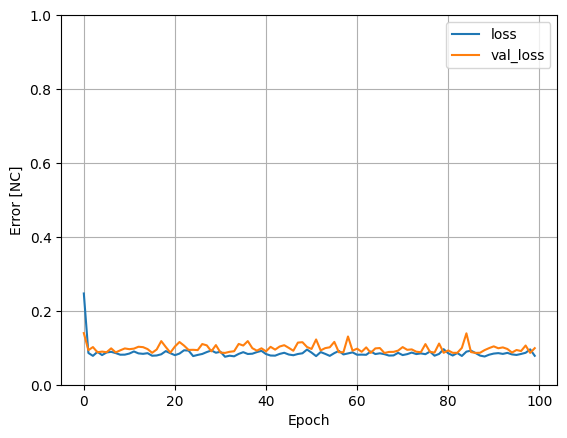

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 3ms/step


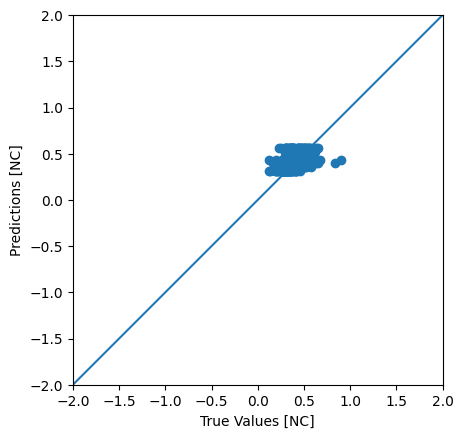

In [ ]:
df_1_test_predictions = df_1_model_0.predict(df_1_test_features_day).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_1_test_labels_day, df_1_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

This scatter plot points what was stated above, as the predicted and actual values are closely plotted along the diagonal line, it shows that the model has had a good performance.

**Dataframe 2**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_2_input_data_day = [df_2["day"], df_2["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_2_input_headers_day = ["day", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_2_input_day = pd.concat(df_2_input_data_day, axis = 1, keys = df_2_input_headers_day)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_2_training_set_day = df_2_input_day.sample(frac = 0.8, random_state = 0)
df_2_test_set_day = df_2_input_day.drop(df_2_training_set_day.index)

# copy the datasets and remove the output column. We do this using pop
df_2_training_features_day = df_2_training_set_day.copy()
df_2_test_features_day = df_2_test_set_day.copy()

df_2_training_labels_day = df_2_training_features_day.pop('NUM_COLLISIONS')
df_2_test_labels_day = df_2_test_features_day.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_2_training_labels_day = df_2_training_labels_day/SCALE_NUM_COLLISIONS
df_2_test_labels_day = df_2_test_labels_day/SCALE_NUM_COLLISIONS

df_2_training_features_day

,day
1905,4
842,4
506,5
697,6
1037,2
...,...
1133,2
1415,5
1875,3
2193,6


In [ ]:
# Normalise the data
df_2_normaliser_day = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
df_2_normaliser_day.adapt(np.array(df_2_training_features_day))

# Defines the model
df_2_model_0 = tf.keras.Sequential([
    df_2_normaliser_day,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_2_model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_2_model_0.fit(
    df_2_training_features_day,
    df_2_training_labels_day,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 11 s, sys: 483 ms, total: 11.5 s
Wall time: 11 s


In [275]:
# saves the model
df_2_model_0.save("df_2_test_model")

In [ ]:
# Evaluates the model
df_2_mean_absolute_error_model_0 = df_2_model_0.evaluate(
    df_2_test_features_day,
    df_2_test_labels_day,
    verbose=0
)

print(df_2_mean_absolute_error_model_0)

0.12395443767309189


This indicates that the dataframe 2 has a pretty good performance as the predicted values are within 0.084 of the actual values.

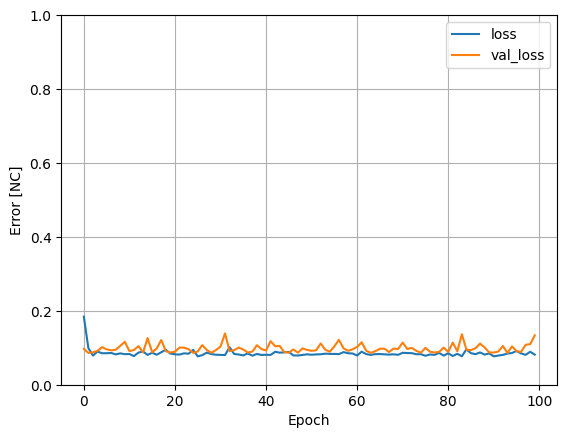

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 3ms/step


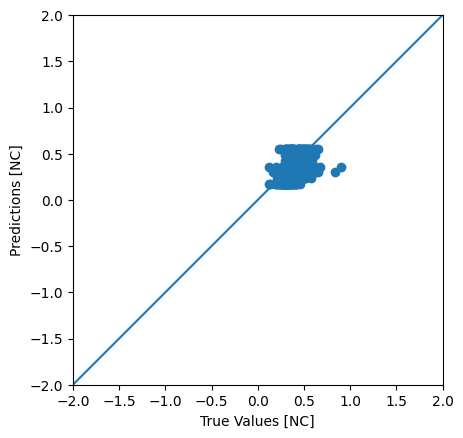

In [ ]:
df_2_test_predictions = df_2_model_0.predict(df_2_test_features_day).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_2_test_labels_day, df_2_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

As df_1 it's the same here, the scatter plot points what was stated above, as the predicted and actual values are closely plotted along the diagonal line, it shows that the model has had a good performance.

**Dataframe 3**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_3_input_data_day = [df_3["day"], df_3["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_3_input_headers_day = ["day", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_3_input_day = pd.concat(df_3_input_data_day, axis = 1, keys = df_3_input_headers_day)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_3_training_set_day = df_3_input_day.sample(frac = 0.8, random_state = 0)
df_3_test_set_day = df_3_input_day.drop(df_3_training_set_day.index)

# copy the datasets and remove the output column. We do this using pop
df_3_training_features_day = df_3_training_set_day.copy()
df_3_test_features_day = df_3_test_set_day.copy()

df_3_training_labels_day = df_3_training_features_day.pop('NUM_COLLISIONS')
df_3_test_labels_day = df_3_test_features_day.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_3_training_labels_day = df_3_training_labels_day/SCALE_NUM_COLLISIONS
df_3_test_labels_day = df_3_test_labels_day/SCALE_NUM_COLLISIONS

df_3_training_features_day

,day
1905,4
842,4
506,5
697,6
1037,2
...,...
1133,2
1415,5
1875,3
2193,6


In [ ]:
# Normalise the data
df_3_normaliser_day = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
df_3_normaliser_day.adapt(np.array(df_3_training_features_day))

# Defines the model
df_3_model_0 = tf.keras.Sequential([
    df_3_normaliser_day,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_3_model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_3_model_0.fit(
    df_3_training_features_day,
    df_3_training_labels_day,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 13.2 s, sys: 494 ms, total: 13.7 s
Wall time: 21.2 s


In [ ]:
# saves the model
df_3_model_0.save("df_3_test_model")

In [ ]:
# Evaluates the model
df_3_mean_absolute_error_model_0 = df_3_model_0.evaluate(
    df_3_test_features_day,
    df_3_test_labels_day,
    verbose=0
)

print(df_3_mean_absolute_error_model_0)

230.91055297851562


This indicates that the dataframe 3 has a very poor performance as the predicted values are within 231.178 of the actual values. This is expected as the values tested here were not normalised which doesn't help when making a model. We can't count out dataframe 3 yet as it holds the normalised weather variables which we can make a model on later.

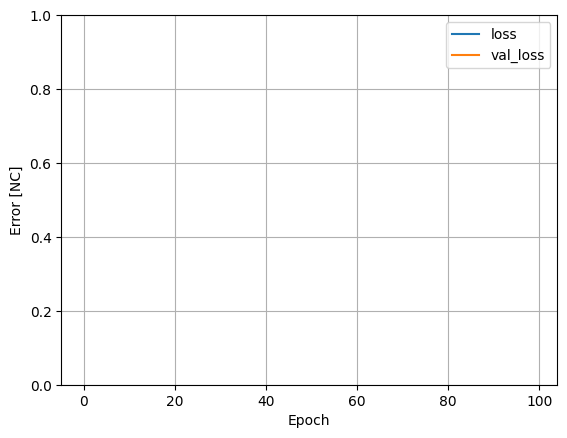

In [ ]:
plot_loss(history)

Due to the poor performance there is nothing to see here

11/11 [==============================] - 0s 6ms/step


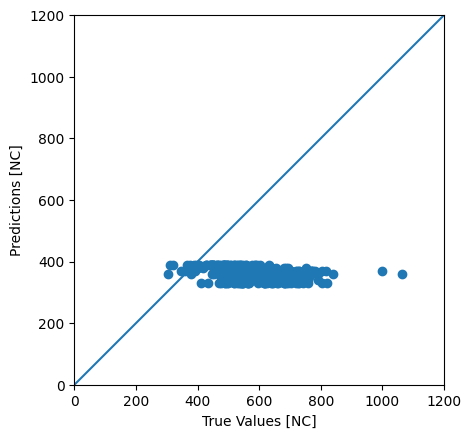

In [ ]:
df_3_test_predictions = df_3_model_0.predict(df_3_test_features_day).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_3_test_labels_day, df_3_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [0, 1200]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

As we can see here, it is very different to df_1 and df_2. This shows a very poor performance from the model, which was discussed above.

# **Linear Regression Models**

Here is where I'll start to make some proper linear regression models, to start with I'm going to start with the variables that were showing some promise from Assignment 1, temp, min, max, and gust against the number of collisions.

# **Temp, Min, Max, Gust, NUM_COLLISIONS Linear Regression Model**

In [ ]:
SCALE_NUM_COLLISIONS = 1.0

**Dataframe 1**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_1_input_data = [df_1["temp"], df_1["min"], df_1["max"], df_1["gust"], df_1["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_1_input_headers = ["temp","min", "max", "gust", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_1_input = pd.concat(df_1_input_data, axis = 1, keys = df_1_input_headers)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_1_training_set = df_1_input.sample(frac = 0.8, random_state = 0)
df_1_test_set = df_1_input.drop(df_1_training_set.index)

# copy the datasets and remove the output column. We do this using pop
df_1_training_features = df_1_training_set.copy()
df_1_test_features = df_1_test_set.copy()

df_1_training_labels = df_1_training_features.pop('NUM_COLLISIONS')
df_1_test_labels = df_1_test_features.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_1_training_labels = df_1_training_labels/SCALE_NUM_COLLISIONS
df_1_test_labels = df_1_test_labels/SCALE_NUM_COLLISIONS

df_1_training_features

,temp,min,max,gust
1905,0.810063,0.918667,0.695122,0.105079
842,0.499371,0.626667,0.390244,0.367776
506,0.397484,0.506667,0.280488,0.544658
697,0.491824,0.588000,0.451220,0.210158
1037,0.605031,0.666667,0.513415,0.227671
...,...,...,...,...
1133,0.693082,0.789333,0.585366,0.155867
1415,0.728302,0.854667,0.757317,0.087566
1875,0.763522,0.854667,0.634146,0.227671
2193,0.706918,0.813333,0.571951,0.245184


In [ ]:
# Normalise the data
df_1_normaliser = tf.keras.layers.Normalization(axis=-1)
df_1_normaliser.adapt(np.array(df_1_training_features))

# Defines the model
df_1_model_1 = tf.keras.Sequential([
    df_1_normaliser,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_1_model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_1_model_1.fit(
    df_1_training_features,
    df_1_training_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 11.7 s, sys: 456 ms, total: 12.2 s
Wall time: 11.4 s


In [ ]:
# saves the model
df_1_model_1.save("df_1_model_1")

In [ ]:
# Evaluates the model
df_1_mean_absolute_error_model_1 = df_1_model_1.evaluate(
    df_1_test_features,
    df_1_test_labels,
    verbose=0
)

print(df_1_mean_absolute_error_model_1)

0.11062019318342209


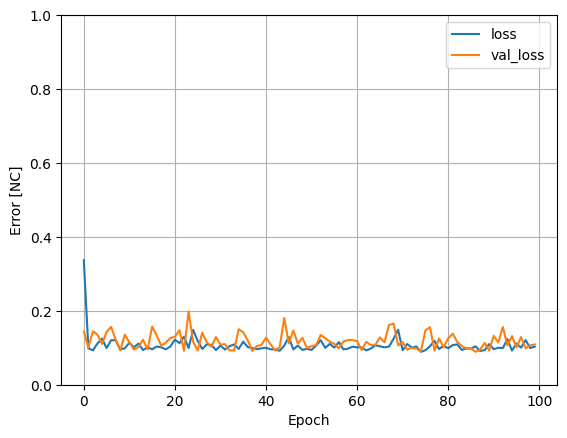

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 4ms/step


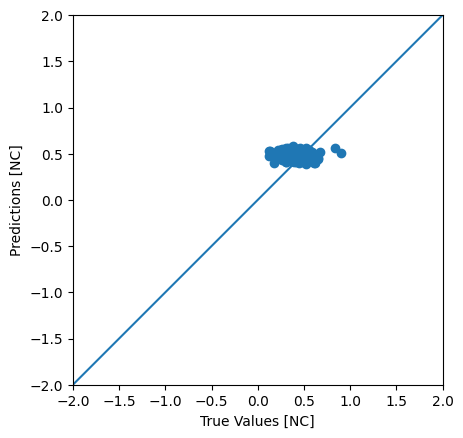

In [ ]:
df_1_test_predictions = df_1_model_1.predict(df_1_test_features).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_1_test_labels, df_1_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

We can see here that the model for the first dataframe appears to be performing very well and predicitng the values fairly accurately. This run around being "0.10289990901947021", granted this will not be the exact number after each run of the code. However, it shows that it will typically be within 0.1 of the actual value.

In [ ]:
df_1_hist = pd.DataFrame(history.history)
df_1_hist['epoch'] = history.epoch
df_1_hist.tail()

,loss,val_loss,epoch
95,0.111502,0.101000,95
96,0.100193,0.129029,96
97,0.120861,0.098307,97
98,0.099264,0.106208,98
99,0.103043,0.109112,99


This here further expresses the performance. Here is some information to elaborate on what it means and how to understand the values being shown.

**loss:** This column represents the training loss at each epoch. The loss value indicates how well the model is performing during training. It represents the difference between the predicted values and the actual values for the training data. Lower values indicate better performance, as they indicate that the model's predictions are closer to the actual values.

**val_loss:** This column represents the validation loss at each epoch. The validation loss is similar to the training loss but is calculated on a separate validation dataset. This dataset is not used for training but is used to evaluate the model's performance on unseen data. Like the training loss, lower values indicate better performance.

**epoch:** This column represents the epoch number, which is the iteration number during training. Each epoch corresponds to one complete pass through the entire training dataset.

In [ ]:
def plot_NUM_COLLISIONS(x,y):
  pp.scatter(train_features['NUM_COLLISIONS'], train_labels, label = 'Data')
  pp.plot(x, y, color = 'k', label = 'Predictions')
  pp.xlabel('Variables')
  pp.ylabel('NUM_COLLISIONS')
  pp.legend()

**Dataframe 2**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_2_input_data = [df_2["temp"], df_2["min"], df_2["max"], df_2["gust"], df_2["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_2_input_headers = ["temp","min", "max", "gust", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_2_input = pd.concat(df_2_input_data, axis = 1, keys = df_2_input_headers)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_2_training_set = df_2_input.sample(frac = 0.8, random_state = 0)
df_2_test_set = df_2_input.drop(df_2_training_set.index)

# copy the datasets and remove the output column. We do this using pop
df_2_training_features = df_2_training_set.copy()
df_2_test_features = df_2_test_set.copy()

df_2_training_labels = df_2_training_features.pop('NUM_COLLISIONS')
df_2_test_labels = df_2_test_features.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_2_training_labels = df_2_training_labels/SCALE_NUM_COLLISIONS
df_2_test_labels = df_2_test_labels/SCALE_NUM_COLLISIONS

df_2_training_features

,temp,min,max,gust
1905,70.2,66.9,75.0,20.0
842,45.5,45.0,50.0,35.0
506,37.4,36.0,41.0,45.1
697,44.9,42.1,55.0,26.0
1037,53.9,48.0,60.1,27.0
...,...,...,...,...
1133,60.9,57.2,66.0,22.9
1415,63.7,62.1,80.1,19.0
1875,66.5,62.1,70.0,27.0
2193,62.0,59.0,64.9,28.0


In [ ]:
# Normalise the data
df_2_normaliser = tf.keras.layers.Normalization(axis=-1)
df_2_normaliser.adapt(np.array(df_2_training_features))

# Defines the model
df_2_model_1 = tf.keras.Sequential([
    df_2_normaliser,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_2_model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_2_model_1.fit(
    df_2_training_features,
    df_2_training_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 12 s, sys: 493 ms, total: 12.4 s
Wall time: 21.3 s


In [ ]:
# saves the model
df_2_model_1.save("df_2_model_1")

In [ ]:
# Evaluates the model
df_2_mean_absolute_error_model_1 = df_2_model_1.evaluate(
    df_2_test_features,
    df_2_test_labels,
    verbose=0
)

print(df_2_mean_absolute_error_model_1)

0.09164883941411972


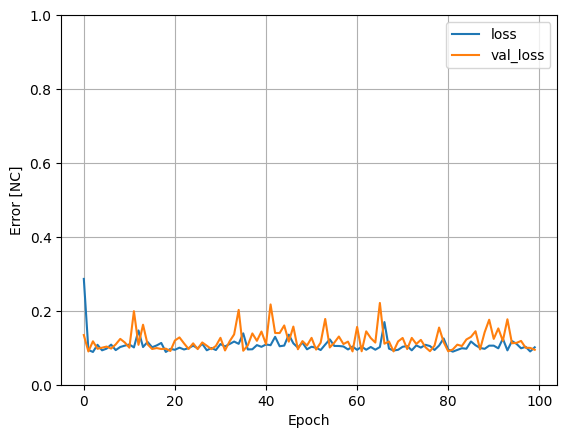

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


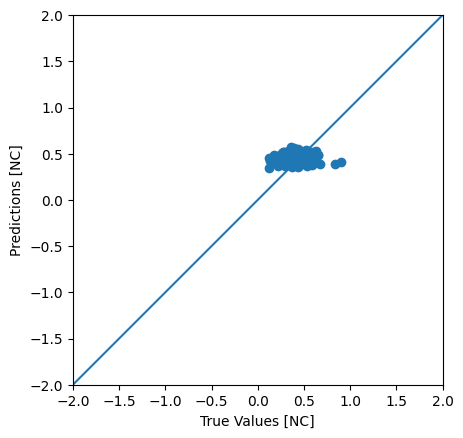

In [ ]:
df_2_test_predictions = df_2_model_1.predict(df_2_test_features).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_2_test_labels, df_2_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

We can see here that the model for the second dataframe appears to outperform the firt dataframe by a little bit. This run around being "0.08531101047992706", granted this will not be the exact number after each run of the code. However, it shows that it will typically be within 0.08 of the actual value which is very good.

In [ ]:
df_2_hist = pd.DataFrame(history.history)
df_2_hist['epoch'] = history.epoch
df_2_hist.tail()

,loss,val_loss,epoch
95,0.110532,0.113177,95
96,0.098551,0.118491,96
97,0.102615,0.100021,97
98,0.090063,0.099630,98
99,0.101235,0.094544,99


**Dataframe 3**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_3_input_data = [df_3["temp"], df_3["min"], df_3["max"], df_3["gust"], df_3["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_3_input_headers = ["temp","min", "max", "gust", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_3_input = pd.concat(df_3_input_data, axis = 1, keys = df_3_input_headers)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_3_training_set = df_3_input.sample(frac = 0.8, random_state = 0)
df_3_test_set = df_3_input.drop(df_3_training_set.index)

# copy the datasets and remove the output column. We do this using pop
df_3_training_features = df_3_training_set.copy()
df_3_test_features = df_3_test_set.copy()

df_3_training_labels = df_3_training_features.pop('NUM_COLLISIONS')
df_3_test_labels = df_3_test_features.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_3_training_labels = df_3_training_labels/SCALE_NUM_COLLISIONS
df_3_test_labels = df_3_test_labels/SCALE_NUM_COLLISIONS

df_3_training_features

,temp,min,max,gust
1905,0.810063,0.918667,0.695122,0.105079
842,0.499371,0.626667,0.390244,0.367776
506,0.397484,0.506667,0.280488,0.544658
697,0.491824,0.588000,0.451220,0.210158
1037,0.605031,0.666667,0.513415,0.227671
...,...,...,...,...
1133,0.693082,0.789333,0.585366,0.155867
1415,0.728302,0.854667,0.757317,0.087566
1875,0.763522,0.854667,0.634146,0.227671
2193,0.706918,0.813333,0.571951,0.245184


In [ ]:
# Normalise the data
df_3_normaliser = tf.keras.layers.Normalization(axis=-1)
df_3_normaliser.adapt(np.array(df_3_training_features))

# Defines the model
df_3_model_1 = tf.keras.Sequential([
    df_3_normaliser,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_3_model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_3_model_1.fit(
    df_3_training_features,
    df_3_training_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 11.6 s, sys: 463 ms, total: 12.1 s
Wall time: 11.3 s


In [ ]:
# saves the model
df_3_model_1.save("df_3_model_1")

In [ ]:
# Evaluates the model
df_3_mean_absolute_error_model_1 = df_3_model_1.evaluate(
    df_3_test_features,
    df_3_test_labels,
    verbose=0
)

print(df_3_mean_absolute_error_model_1)

233.01576232910156


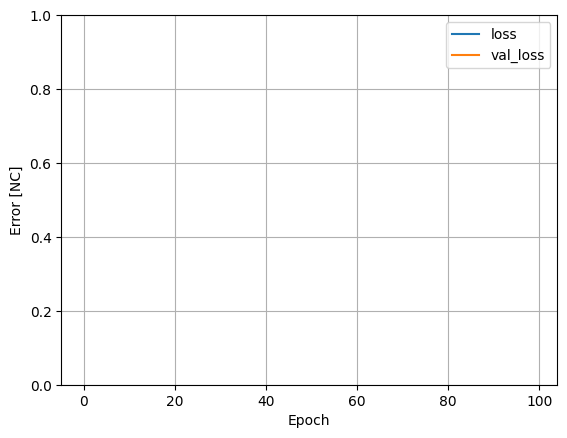

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


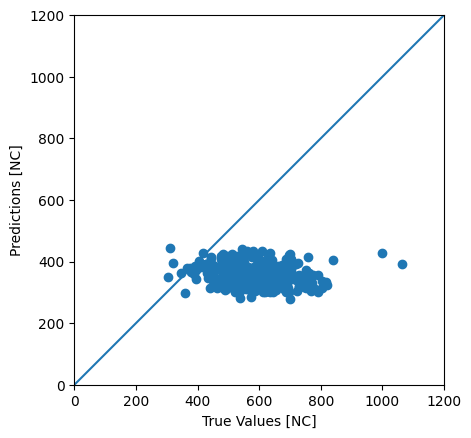

In [ ]:
df_3_test_predictions = df_3_model_1.predict(df_3_test_features).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_3_test_labels, df_3_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [0, 1200]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

This I was not expecting, as the third dataset has the weather variables normalised, I was expecting a much better output than "234.09886169433594". I didn't think it would peform as good as the first dataframe, I did expect it to out peform the second dataframe though. I will continue to analyse this data in other regression models, but I think it might be a dud... that, or I'm doing something wrong.

In [ ]:
df_3_hist = pd.DataFrame(history.history)
df_3_hist['epoch'] = history.epoch
df_3_hist.tail()

,loss,val_loss,epoch
95,249.911514,256.967346,95
96,246.474442,253.583832,96
97,243.049423,250.040710,97
98,239.597458,246.345581,98
99,236.157501,242.860901,99


# **All Weather Variables Linear Regression Model**


**Dataframe 1**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_1_input_data_1 = [df_1["temp"], df_1["dewp"], df_1["slp"], df_1["visib"], df_1["wdsp"], df_1["mxpsd"], df_1["gust"], df_1["max"], df_1["min"], df_1["prcp"], df_1["fog"], df_1["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_1_input_headers_1 = ["temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "fog", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_1_input_1 = pd.concat(df_1_input_data_1, axis = 1, keys = df_1_input_headers_1)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_1_training_set_1 = df_1_input_1.sample(frac = 0.8, random_state = 0)
df_1_test_set_1 = df_1_input_1.drop(df_1_training_set_1.index)

# copy the datasets and remove the output column. We do this using pop
df_1_training_features_1 = df_1_training_set_1.copy()
df_1_test_features_1 = df_1_test_set_1.copy()

df_1_training_labels_1 = df_1_training_features_1.pop('NUM_COLLISIONS')
df_1_test_labels_1 = df_1_test_features_1.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_1_training_labels_1 = df_1_training_labels_1/SCALE_NUM_COLLISIONS
df_1_test_labels_1 = df_1_test_labels_1/SCALE_NUM_COLLISIONS

df_1_training_features_1

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1905,0.810063,0.007425,0.493014,0.500000,0.256000,0.211905,0.105079,0.695122,0.918667,0.000000,0
842,0.499371,0.005057,0.293413,0.563830,0.525333,0.452381,0.367776,0.390244,0.626667,0.138298,0
506,0.397484,0.004187,0.381238,0.287234,0.709333,0.666667,0.544658,0.280488,0.506667,0.420213,0
697,0.491824,0.004327,0.401198,0.936170,0.277333,0.264286,0.210158,0.451220,0.588000,0.000000,0
1037,0.605031,0.006006,0.479042,0.255319,0.237333,0.285714,0.227671,0.513415,0.666667,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
1133,0.693082,0.006526,0.477046,0.265957,0.082667,0.119048,0.155867,0.585366,0.789333,0.018617,1
1415,0.728302,0.006816,0.586826,0.893617,0.189333,0.142857,0.087566,0.757317,0.854667,0.000000,0
1875,0.763522,0.007045,0.447106,0.765957,0.245333,0.333333,0.227671,0.634146,0.854667,0.359043,0
2193,0.706918,0.006686,0.640719,0.117021,0.325333,0.285714,0.245184,0.571951,0.813333,0.433511,1


In [ ]:
# Normalise the data
df_1_normaliser_1 = tf.keras.layers.Normalization(axis=-1)
df_1_normaliser_1.adapt(np.array(df_1_training_features_1))

# Defines the model
df_1_model_2 = tf.keras.Sequential([
    df_1_normaliser_1,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_1_model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_1_model_2.fit(
    df_1_training_features_1,
    df_1_training_labels_1,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 13.7 s, sys: 529 ms, total: 14.3 s
Wall time: 13.9 s


In [ ]:
# saves the model
df_1_model_2.save("df_1_model_2")

In [ ]:
# Evaluates the model
df_1_mean_absolute_error_model_2 = df_1_model_2.evaluate(
    df_1_test_features_1,
    df_1_test_labels_1,
    verbose=0
)

print(df_1_mean_absolute_error_model_2)

0.14040639996528625


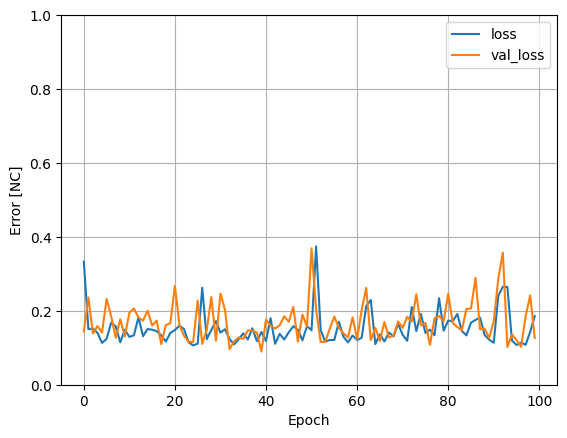

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 3ms/step


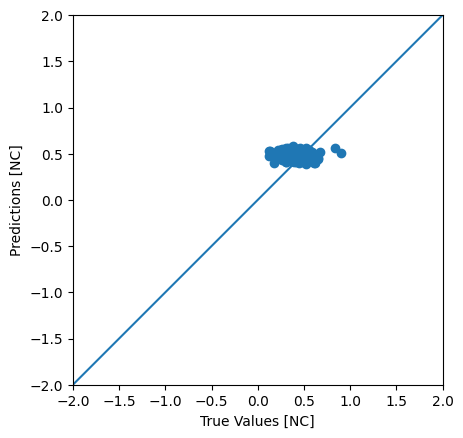

In [ ]:
df_1_test_predictions_1 = df_1_model_2.predict(df_1_test_features_1).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_1_test_labels_1, df_1_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

We can see that it is similar to the set of variables of only temp, min, max, guts, and NUM_COLLISIONS. However, the peformance this time around was "0.14040639996528625". This is still ok, but compared to how it was before of "0.11062019318342209" it is slightly worse in predicting the correct values.

In [ ]:
df_1_hist = pd.DataFrame(history.history)
df_1_hist['epoch'] = history.epoch
df_1_hist.tail()

,loss,val_loss,epoch
95,0.107468,0.121255,95
96,0.113650,0.102542,96
97,0.108000,0.184890,97
98,0.142927,0.241690,98
99,0.185594,0.126571,99


**Dataframe 2**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_2_input_data_1 = [df_2["temp"], df_2["dewp"], df_2["slp"], df_2["visib"], df_2["wdsp"], df_2["mxpsd"], df_2["gust"], df_2["max"], df_2["min"], df_2["prcp"], df_2["fog"], df_2["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_2_input_headers_1 = ["temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "fog", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_2_input_1 = pd.concat(df_2_input_data_1, axis = 1, keys = df_2_input_headers_1)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_2_training_set_1 = df_2_input_1.sample(frac = 0.8, random_state = 0)
df_2_test_set_1 = df_2_input_1.drop(df_2_training_set_1.index)

# copy the datasets and remove the output column. We do this using pop
df_2_training_features_1 = df_2_training_set_1.copy()
df_2_test_features_1 = df_2_test_set_1.copy()

df_2_training_labels_1 = df_2_training_features_1.pop('NUM_COLLISIONS')
df_2_test_labels_1 = df_2_test_features_1.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_2_training_labels_1 = df_2_training_labels_1/SCALE_NUM_COLLISIONS
df_2_test_labels_1 = df_2_test_labels_1/SCALE_NUM_COLLISIONS

df_2_training_features_1

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1905,70.2,67.6,1013.7,5.3,11.4,15.9,20.0,75.0,66.9,0.00,0
842,45.5,43.9,1003.7,5.9,21.5,26.0,35.0,50.0,45.0,0.52,0
506,37.4,35.2,1008.1,3.3,28.4,35.0,45.1,41.0,36.0,1.58,0
697,44.9,36.6,1009.1,9.4,12.2,18.1,26.0,55.0,42.1,0.00,0
1037,53.9,53.4,1013.0,3.0,10.7,19.0,27.0,60.1,48.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
1133,60.9,58.6,1012.9,3.1,4.9,12.0,22.9,66.0,57.2,0.07,1
1415,63.7,61.5,1018.4,9.0,8.9,13.0,19.0,80.1,62.1,0.00,0
1875,66.5,63.8,1011.4,7.8,11.0,21.0,27.0,70.0,62.1,1.35,0
2193,62.0,60.2,1021.1,1.7,14.0,19.0,28.0,64.9,59.0,1.63,1


In [ ]:
# Normalise the data
df_2_normaliser_1 = tf.keras.layers.Normalization(axis=-1)
df_2_normaliser_1.adapt(np.array(df_2_training_features_1))

# Defines the model
df_2_model_2 = tf.keras.Sequential([
    df_2_normaliser_1,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_2_model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_2_model_2.fit(
    df_2_training_features_1,
    df_2_training_labels_1,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 13.4 s, sys: 557 ms, total: 14 s
Wall time: 21.1 s


In [ ]:
# saves the model
df_2_model_2.save("df_2_model_2")

In [ ]:
# Evaluates the model
df_2_mean_absolute_error_model_2 = df_2_model_2.evaluate(
    df_2_test_features_1,
    df_2_test_labels_1,
    verbose=0
)

print(df_2_mean_absolute_error_model_2)

0.12886840105056763


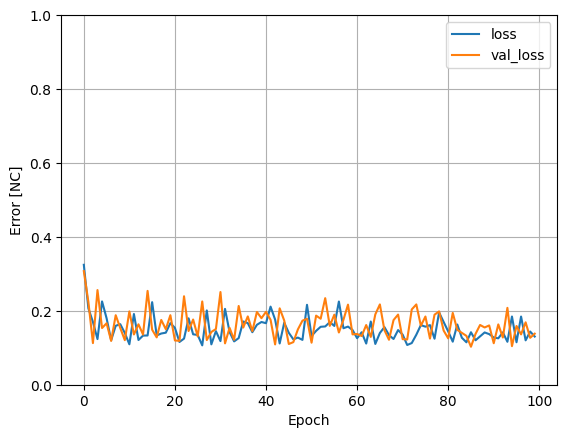

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 4ms/step


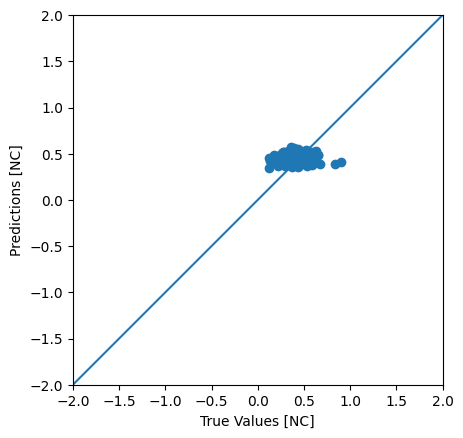

In [ ]:
df_2_test_predictions_1 = df_2_model_2.predict(df_2_test_features_1).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_2_test_labels_1, df_2_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

We can see that this follows a similiar pattern of the first dataframe in comparison to the dataframe 2 for the variables, temp, min, max, gust, and NUM_COLLISIONS. Now it's "0.12886840105056763", whereas it was "0.09164883941411972" before.

In [ ]:
df_2_hist = pd.DataFrame(history.history)
df_2_hist['epoch'] = history.epoch
df_2_hist.tail()

**Dataframe 3**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_3_input_data_1 = [df_3["temp"], df_3["dewp"], df_3["slp"], df_3["visib"], df_3["wdsp"], df_3["mxpsd"], df_3["gust"], df_3["max"], df_3["min"], df_3["prcp"], df_3["fog"], df_3["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_3_input_headers_1 = ["temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "fog", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_3_input_1 = pd.concat(df_3_input_data_1, axis = 1, keys = df_3_input_headers_1)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_3_training_set_1 = df_3_input_1.sample(frac = 0.8, random_state = 0)
df_3_test_set_1 = df_3_input_1.drop(df_3_training_set_1.index)

# copy the datasets and remove the output column. We do this using pop
df_3_training_features_1 = df_3_training_set_1.copy()
df_3_test_features_1 = df_3_test_set_1.copy()

df_3_training_labels_1 = df_3_training_features_1.pop('NUM_COLLISIONS')
df_3_test_labels_1 = df_3_test_features_1.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_3_training_labels_1 = df_3_training_labels_1/SCALE_NUM_COLLISIONS
df_3_test_labels_1 = df_3_test_labels_1/SCALE_NUM_COLLISIONS

df_3_training_features_1

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1905,0.810063,0.007425,0.493014,0.500000,0.256000,0.211905,0.105079,0.695122,0.918667,0.000000,0
842,0.499371,0.005057,0.293413,0.563830,0.525333,0.452381,0.367776,0.390244,0.626667,0.138298,0
506,0.397484,0.004187,0.381238,0.287234,0.709333,0.666667,0.544658,0.280488,0.506667,0.420213,0
697,0.491824,0.004327,0.401198,0.936170,0.277333,0.264286,0.210158,0.451220,0.588000,0.000000,0
1037,0.605031,0.006006,0.479042,0.255319,0.237333,0.285714,0.227671,0.513415,0.666667,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
1133,0.693082,0.006526,0.477046,0.265957,0.082667,0.119048,0.155867,0.585366,0.789333,0.018617,1
1415,0.728302,0.006816,0.586826,0.893617,0.189333,0.142857,0.087566,0.757317,0.854667,0.000000,0
1875,0.763522,0.007045,0.447106,0.765957,0.245333,0.333333,0.227671,0.634146,0.854667,0.359043,0
2193,0.706918,0.006686,0.640719,0.117021,0.325333,0.285714,0.245184,0.571951,0.813333,0.433511,1


In [ ]:
# Normalise the data
df_3_normaliser_1 = tf.keras.layers.Normalization(axis=-1)
df_3_normaliser_1.adapt(np.array(df_3_training_features_1))

# Defines the model
df_3_model_2 = tf.keras.Sequential([
    df_3_normaliser_1,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_3_model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_3_model_2.fit(
    df_3_training_features_1,
    df_3_training_labels_1,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 12.8 s, sys: 594 ms, total: 13.4 s
Wall time: 12.6 s


In [ ]:
# saves the model
df_3_model_2.save("df_3_model_2")

In [ ]:
# Evaluates the model
df_3_mean_absolute_error_model_2 = df_3_model_2.evaluate(
    df_3_test_features_1,
    df_3_test_labels_1,
    verbose=0
)

print(df_3_mean_absolute_error_model_2)

243.04794311523438


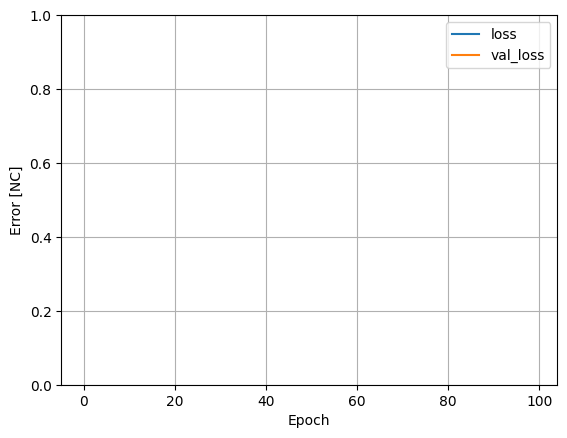

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 4ms/step


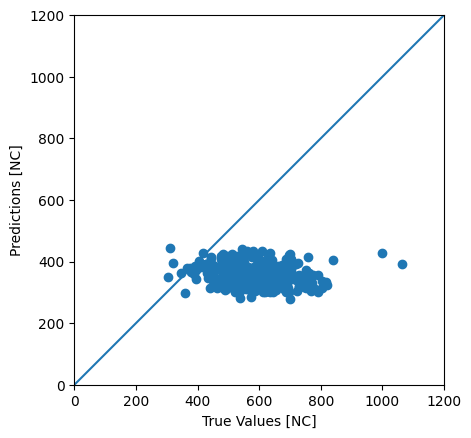

In [ ]:
df_3_test_predictions_1 = df_3_model_2.predict(df_3_test_features_1).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_3_test_labels_1, df_3_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [0, 1200]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

Once again the third dataframe appears to be performing poorly, due to this I will stop running regression models on this dataframe as it's not amounting to anything meaningful. I think we can conclude this to the lack of normalisation done to this dataset.

In [ ]:
df_3_hist = pd.DataFrame(history.history)
df_3_hist['epoch'] = history.epoch
df_3_hist.tail()

,loss,val_loss,epoch
95,250.419968,259.644531,95
96,246.920609,256.064270,96
97,243.418488,252.625000,97
98,240.025040,249.189423,98
99,236.495087,245.806107,99


# **All Variables Linear Regression Model**

This will include day, month and year, this is out the scope of the assignment, but I am curious as to see how this will affect the peformance of the models.

**Dataframe 1**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_1_input_data_2 = [df_1["day"], df_1["mo"], df_1["year"], df_1["da"], df_1["temp"], df_1["dewp"], df_1["slp"], df_1["visib"], df_1["wdsp"], df_1["mxpsd"], df_1["gust"], df_1["max"], df_1["min"], df_1["prcp"], df_1["fog"], df_1["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_1_input_headers_2 = ["day", "mo", "year", "da", "temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "fog", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_1_input_2 = pd.concat(df_1_input_data_2, axis = 1, keys = df_1_input_headers_2)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_1_training_set_2 = df_1_input_2.sample(frac = 0.8, random_state = 0)
df_1_test_set_2 = df_1_input_2.drop(df_1_training_set_2.index)

# copy the datasets and remove the output column. We do this using pop
df_1_training_features_2 = df_1_training_set_2.copy()
df_1_test_features_2 = df_1_test_set_2.copy()

df_1_training_labels_2 = df_1_training_features_2.pop('NUM_COLLISIONS')
df_1_test_labels_2 = df_1_test_features_2.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_1_training_labels_2 = df_1_training_labels_2/SCALE_NUM_COLLISIONS
df_1_test_labels_2 = df_1_test_labels_2/SCALE_NUM_COLLISIONS

df_1_training_features_2

,day,mo,year,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1905,0.500000,0.727273,0.142857,0.366667,0.810063,0.007425,0.493014,0.500000,0.256000,0.211905,0.105079,0.695122,0.918667,0.000000,0
842,0.500000,0.363636,0.571429,0.133333,0.499371,0.005057,0.293413,0.563830,0.525333,0.452381,0.367776,0.390244,0.626667,0.138298,0
506,0.666667,0.181818,0.142857,0.233333,0.397484,0.004187,0.381238,0.287234,0.709333,0.666667,0.544658,0.280488,0.506667,0.420213,0
697,0.833333,0.272727,0.285714,0.833333,0.491824,0.004327,0.401198,0.936170,0.277333,0.264286,0.210158,0.451220,0.588000,0.000000,0
1037,0.166667,0.363636,0.857143,0.466667,0.605031,0.006006,0.479042,0.255319,0.237333,0.285714,0.227671,0.513415,0.666667,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.166667,0.454545,0.142857,0.566667,0.693082,0.006526,0.477046,0.265957,0.082667,0.119048,0.155867,0.585366,0.789333,0.018617,1
1415,0.666667,0.545455,0.714286,0.433333,0.728302,0.006816,0.586826,0.893617,0.189333,0.142857,0.087566,0.757317,0.854667,0.000000,0
1875,0.333333,0.727273,0.857143,0.600000,0.763522,0.007045,0.447106,0.765957,0.245333,0.333333,0.227671,0.634146,0.854667,0.359043,0
2193,0.833333,0.818182,0.571429,0.000000,0.706918,0.006686,0.640719,0.117021,0.325333,0.285714,0.245184,0.571951,0.813333,0.433511,1


In [ ]:
# Normalise the data
df_1_normaliser_2 = tf.keras.layers.Normalization(axis=-1)
df_1_normaliser_2.adapt(np.array(df_1_training_features_2))

# Defines the model
df_1_model_3 = tf.keras.Sequential([
    df_1_normaliser_2,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_1_model_3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_1_model_3.fit(
    df_1_training_features_2,
    df_1_training_labels_2,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 12.4 s, sys: 484 ms, total: 12.8 s
Wall time: 12.4 s


In [ ]:
# saves the model
df_1_model_3.save("df_1_model_3")

In [ ]:
# Evaluates the model
df_1_mean_absolute_error_model_3 = df_1_model_3.evaluate(
    df_1_test_features_2,
    df_1_test_labels_2,
    verbose=0
)

print(df_1_mean_absolute_error_model_3)

0.2748367488384247


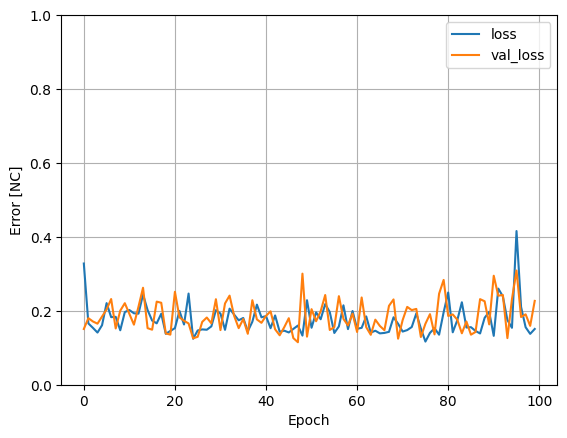

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


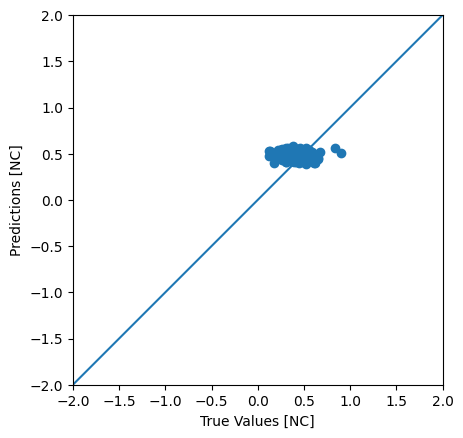

In [ ]:
df_1_test_predictions_2 = df_1_model_3.predict(df_1_test_features_2).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_1_test_labels_2, df_1_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

From what I can tell here the peformance of the model has once again been lowered when there are more variables being predicted, which I would expect. It's not withing a range of "0.2748367488384247" the actual values.

In [ ]:
df_1_hist = pd.DataFrame(history.history)
df_1_hist['epoch'] = history.epoch
df_1_hist.tail()

,loss,val_loss,epoch
95,0.415767,0.308983,95
96,0.210432,0.183213,96
97,0.155549,0.190452,97
98,0.137566,0.159274,98
99,0.150877,0.226820,99


**Dataframe 2**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_2_input_data_2 = [df_2["day"], df_2["mo"], df_2["year"], df_2["da"], df_2["temp"], df_2["dewp"], df_2["slp"], df_2["visib"], df_2["wdsp"], df_2["mxpsd"], df_2["gust"], df_2["max"], df_2["min"], df_2["prcp"], df_2["fog"], df_2["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_2_input_headers_2 = ["day", "mo", "year", "da", "temp", "dewp", "slp", "visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "fog", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_2_input_2 = pd.concat(df_2_input_data_2, axis = 1, keys = df_2_input_headers_2)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_2_training_set_2 = df_2_input_2.sample(frac = 0.8, random_state = 0)
df_2_test_set_2 = df_2_input_2.drop(df_2_training_set_2.index)

# copy the datasets and remove the output column. We do this using pop
df_2_training_features_2 = df_2_training_set_2.copy()
df_2_test_features_2 = df_2_test_set_2.copy()

df_2_training_labels_2 = df_2_training_features_2.pop('NUM_COLLISIONS')
df_2_test_labels_2 = df_2_test_features_2.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_2_training_labels_2 = df_2_training_labels_2/SCALE_NUM_COLLISIONS
df_2_test_labels_2 = df_2_test_labels_2/SCALE_NUM_COLLISIONS

df_2_training_features_2

,day,mo,year,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog
1905,4,9,2013,12,70.2,67.6,1013.7,5.3,11.4,15.9,20.0,75.0,66.9,0.00,0
842,4,5,2016,5,45.5,43.9,1003.7,5.9,21.5,26.0,35.0,50.0,45.0,0.52,0
506,5,3,2013,8,37.4,35.2,1008.1,3.3,28.4,35.0,45.1,41.0,36.0,1.58,0
697,6,4,2014,26,44.9,36.6,1009.1,9.4,12.2,18.1,26.0,55.0,42.1,0.00,0
1037,2,5,2018,15,53.9,53.4,1013.0,3.0,10.7,19.0,27.0,60.1,48.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2,6,2013,18,60.9,58.6,1012.9,3.1,4.9,12.0,22.9,66.0,57.2,0.07,1
1415,5,7,2017,14,63.7,61.5,1018.4,9.0,8.9,13.0,19.0,80.1,62.1,0.00,0
1875,3,9,2018,19,66.5,63.8,1011.4,7.8,11.0,21.0,27.0,70.0,62.1,1.35,0
2193,6,10,2016,1,62.0,60.2,1021.1,1.7,14.0,19.0,28.0,64.9,59.0,1.63,1


In [ ]:
# Normalise the data
df_2_normaliser_2 = tf.keras.layers.Normalization(axis=-1)
df_2_normaliser_2.adapt(np.array(df_2_training_features_2))

# Defines the model
df_2_model_3 = tf.keras.Sequential([
    df_2_normaliser_2,
    tf.keras.layers.Dense(units=1)
])

# Compiles the model
df_2_model_3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_2_model_3.fit(
    df_2_training_features_2,
    df_2_training_labels_2,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 12.3 s, sys: 513 ms, total: 12.8 s
Wall time: 12.1 s


In [ ]:
# saves the model
df_2_model_3.save("df_2_model_3")

In [ ]:
# Evaluates the model
df_2_mean_absolute_error_model_3 = df_2_model_3.evaluate(
    df_2_test_features_2,
    df_2_test_labels_2,
    verbose=0
)

print(df_2_mean_absolute_error_model_3)

0.15132805705070496


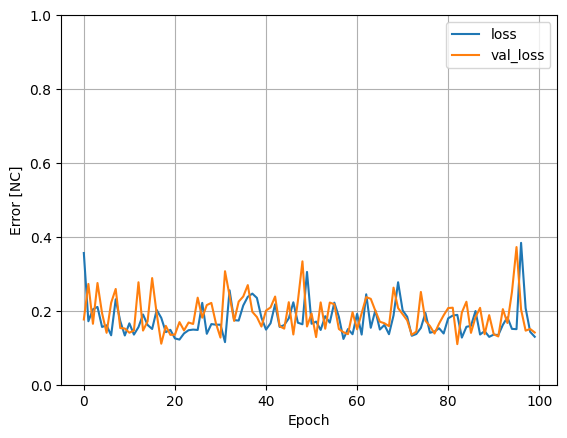

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


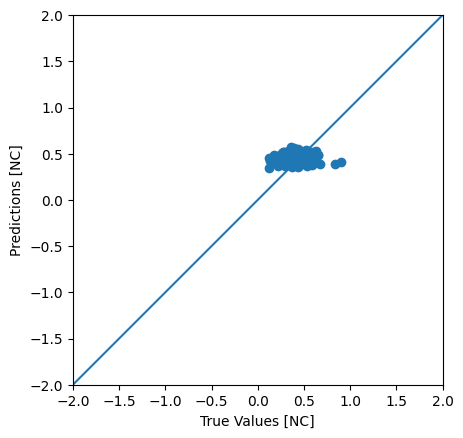

In [ ]:
df_2_test_predictions_2 = df_2_model_3.predict(df_2_test_features_2).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_2_test_labels_2, df_2_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

Once again, similarly to the first dataframe, the performance has dropped, however, it has not dropped as much as the first dataframe which is interesting to see.

In [ ]:
df_2_hist = pd.DataFrame(history.history)
df_2_hist['epoch'] = history.epoch
df_2_hist.tail()

,loss,val_loss,epoch
95,0.150363,0.372478,95
96,0.383862,0.203551,96
97,0.207218,0.146311,97
98,0.143063,0.150839,98
99,0.129736,0.141335,99


# **DNN (Deep Neural Network) Regression Models**

Here is where I'll make a DNN regression model on both dataframes, but only for variables temp, min, max, gust, and NUM_COLLISIONS as that was the model that showed the best peformance from the linear regression models.

# **Temp, Min, Max, Gust, NUM_COLLISIONS DNN Regression Model**

**Dataframe 1**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_1_dnn_input_data = [df_1["temp"], df_1["min"], df_1["max"], df_1["gust"], df_1["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_1_dnn_input_headers = ["temp","min", "max", "gust", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_1_dnn_input = pd.concat(df_1_dnn_input_data, axis = 1, keys = df_1_dnn_input_headers)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_1_dnn_training_set = df_1_dnn_input.sample(frac = 0.8, random_state = 0)
df_1_dnn_test_set = df_1_dnn_input.drop(df_1_dnn_training_set.index)

# copy the datasets and remove the output column. We do this using pop
df_1_dnn_training_features = df_1_dnn_training_set.copy()
df_1_dnn_test_features = df_1_dnn_test_set.copy()

df_1_dnn_training_labels = df_1_dnn_training_features.pop('NUM_COLLISIONS')
df_1_dnn_test_labels = df_1_dnn_test_features.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_1_dnn_training_labels = df_1_dnn_training_labels/SCALE_NUM_COLLISIONS
df_1_dnn_test_labels = df_1_dnn_test_labels/SCALE_NUM_COLLISIONS

df_1_dnn_training_features

,temp,min,max,gust
1905,0.810063,0.918667,0.695122,0.105079
842,0.499371,0.626667,0.390244,0.367776
506,0.397484,0.506667,0.280488,0.544658
697,0.491824,0.588000,0.451220,0.210158
1037,0.605031,0.666667,0.513415,0.227671
...,...,...,...,...
1133,0.693082,0.789333,0.585366,0.155867
1415,0.728302,0.854667,0.757317,0.087566
1875,0.763522,0.854667,0.634146,0.227671
2193,0.706918,0.813333,0.571951,0.245184


In [ ]:
# Normalise the data
df_1_dnn_normaliser = tf.keras.layers.Normalization(axis=-1)
df_1_dnn_normaliser.adapt(np.array(df_1_dnn_training_features))

# Defines the model
df_1_dnn_model_0 = tf.keras.Sequential([
    df_1_dnn_normaliser,
    layers.Dense(120, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(1)
])

# Compiles the model
df_1_dnn_model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_1_dnn_model_0.fit(
    df_1_dnn_training_features,
    df_1_dnn_training_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 2min 24s, sys: 5.62 s, total: 2min 29s
Wall time: 3min 23s


In [ ]:
# saves the model
df_1_dnn_model_0.save("df_1_dnn_model")

In [ ]:
# Evaluates the model
df_1_dnn_mean_absolute_error_model_0 = df_1_dnn_model_0.evaluate(
    df_1_dnn_test_features,
    df_1_dnn_test_labels,
    verbose=0
)

print(df_1_dnn_mean_absolute_error_model_0)

0.09910091757774353


With the starting number of 48, I have increased the density by 24 each time to see where when it's better, it appeared to be better at a density of 120.

48 = 0.08435121178627014

72 = 0.08454757928848267

96 = 0.08361289650201797

120 = 0.08073160797357559

144 = 0.08131981641054153

The next step was to increase the epochs to 1000 to see if this increased the peformance of the dnn regression model by any significant margin.

120 = 0.09910091757774353

As it got worse, I would say sticking to 100 itterations is best as doing 1000 takes a significant more amount of time to process just for it to be worse.

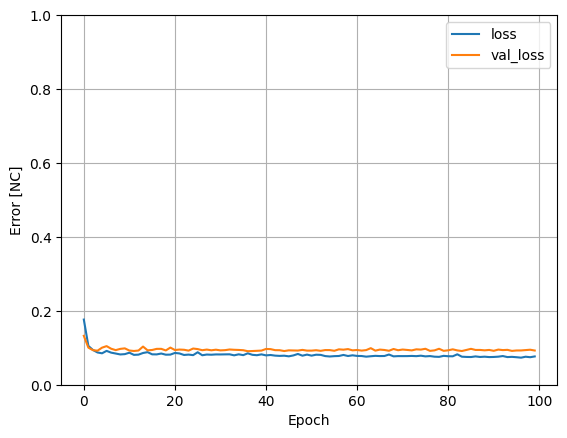

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


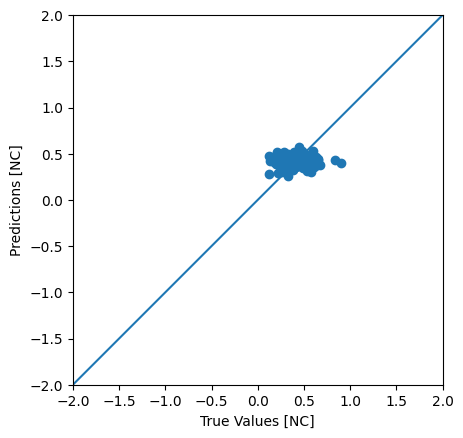

In [ ]:
df_1_dnn_test_predictions = df_1_dnn_model_0.predict(df_1_dnn_test_features).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_1_dnn_test_labels, df_1_dnn_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

As we can see though, the dnn has a very good peformance as it gets within "0.08073160797357559" of the actual value. Compared to the Linear Regression Model "0.11062019318342209", this is better.

In [ ]:
df_1_dnn_hist = pd.DataFrame(history.history)
df_1_dnn_hist['epoch'] = history.epoch
df_1_dnn_hist.tail()

,loss,val_loss,epoch
95,0.075386,0.092928,95
96,0.076225,0.091572,96
97,0.075217,0.093852,97
98,0.075307,0.095314,98
99,0.076613,0.094204,99


**Dataframe 2**

In [ ]:
# create a dataframe with the inputs and the output at the end using the imported dataframe
df_2_dnn_input_data = [df_2["temp"], df_2["min"], df_2["max"], df_2["gust"], df_2["NUM_COLLISIONS"]]

# create headers for the new dataframe. These should correlate with the above
df_2_dnn_input_headers = ["temp","min", "max", "gust", "NUM_COLLISIONS"]

#create a final dataframe using the new dataframe and headers
df_2_dnn_input = pd.concat(df_2_dnn_input_data, axis = 1, keys = df_2_dnn_input_headers)

# construct a training set for running through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test
df_2_dnn_training_set = df_2_dnn_input.sample(frac = 0.8, random_state = 0)
df_2_dnn_test_set = df_2_dnn_input.drop(df_2_dnn_training_set.index)

# copy the datasets and remove the output column. We do this using pop
df_2_dnn_training_features = df_2_dnn_training_set.copy()
df_2_dnn_test_features = df_2_dnn_test_set.copy()

df_2_dnn_training_labels = df_2_dnn_training_features.pop('NUM_COLLISIONS')
df_2_dnn_test_labels = df_2_dnn_test_features.pop('NUM_COLLISIONS')

# Here I have put a scale factor and divided by it
df_2_dnn_training_labels = df_2_dnn_training_labels/SCALE_NUM_COLLISIONS
df_2_dnn_test_labels = df_2_dnn_test_labels/SCALE_NUM_COLLISIONS

df_2_dnn_training_features

,temp,min,max,gust
1905,70.2,66.9,75.0,20.0
842,45.5,45.0,50.0,35.0
506,37.4,36.0,41.0,45.1
697,44.9,42.1,55.0,26.0
1037,53.9,48.0,60.1,27.0
...,...,...,...,...
1133,60.9,57.2,66.0,22.9
1415,63.7,62.1,80.1,19.0
1875,66.5,62.1,70.0,27.0
2193,62.0,59.0,64.9,28.0


In [ ]:
# Normalise the data
df_2_dnn_normaliser = tf.keras.layers.Normalization(axis=-1)
df_2_dnn_normaliser.adapt(np.array(df_2_dnn_training_features))

# Defines the model
df_2_dnn_model_0 = tf.keras.Sequential([
    df_2_dnn_normaliser,
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(1)
])

# Compiles the model
df_2_dnn_model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)

In [ ]:
# Fit the model
%%time
history = df_2_dnn_model_0.fit(
    df_2_dnn_training_features,
    df_2_dnn_training_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 2min 22s, sys: 5.74 s, total: 2min 28s
Wall time: 3min 22s


In [ ]:
# saves the model
df_2_dnn_model_0.save("df_2_dnn_model")

In [ ]:
# Evaluates the model
df_2_dnn_mean_absolute_error_model_0 = df_2_dnn_model_0.evaluate(
    df_2_dnn_test_features,
    df_2_dnn_test_labels,
    verbose=0
)

print(df_2_dnn_mean_absolute_error_model_0)

0.10027753561735153


I will perform the same density test that I did for the first dataframe

48 = 0.08718360215425491

72 = 0.08276835083961487

96 = 0.08122969418764114

120 = 0.08233991265296936

144 = 0.08499138057231903

This time around the layer density of 96 seems to give the best peformance, so the next step is to increase the epochs to 1000 to see if this increased the peformance of the dnn regression model by any significant margin.

96 = 0.10027753561735153

As it got worse like the first dataframe, we can assume the longer they iterate over the data the worse the predictions become. As this is the case I will stick with 100 iterations.

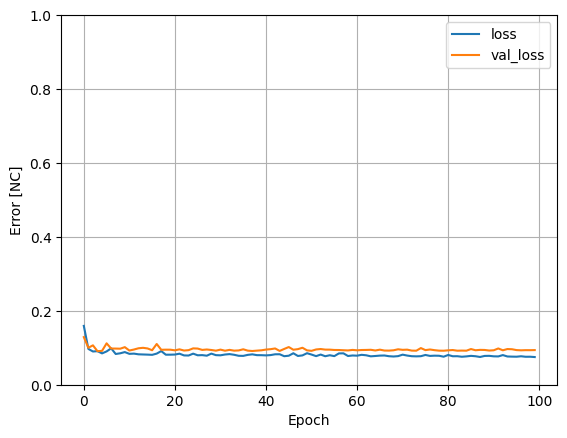

In [ ]:
plot_loss(history)

11/11 [==============================] - 0s 2ms/step


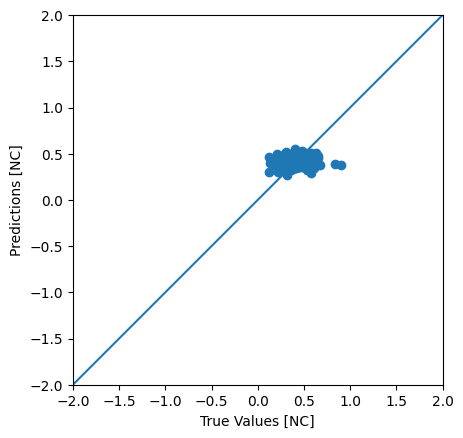

In [ ]:
df_2_dnn_test_predictions = df_2_dnn_model_0.predict(df_2_dnn_test_features).flatten()

a = pp.axes(aspect = 'equal')
pp.scatter(df_2_dnn_test_labels, df_2_dnn_test_predictions)
pp.xlabel('True Values [NC]')
pp.ylabel('Predictions [NC]')
lims = [-2, 2]
pp.xlim(lims)
pp.ylim(lims)
_ = pp.plot(lims, lims)

As we can see though the dnn regression model provides a better performance to the linear regression model "0.08122969418764114". Comparing this to the linear regression model "0.12395443767309189" the dnn is much better in this case being closer to the actual value by 0.04.

In [ ]:
df_2_dnn_hist = pd.DataFrame(history.history)
df_2_dnn_hist['epoch'] = history.epoch
df_2_dnn_hist.tail()

,loss,val_loss,epoch
95,0.075804,0.093697,95
96,0.076978,0.093095,96
97,0.075649,0.093514,97
98,0.075746,0.093443,98
99,0.074852,0.093717,99


# **Comparitive Analysis**

Due to running out of words to write, I'll have to keep this brief... Comparing all the models from each dataset, we can immediately see that the third dataframe is useless. Comparing the first and second, the best performing model was the dnn model for dataframe 1.

LRM = Linear Regression Model

DRM = DNN Regression Model

df_1_LRM_0 = 0.10289

df_2_LRM_0 = 0.09164

df_1_LRM_1 = 0.14040

df_2_LRM_1 = 0.12886

df_1_LRM_2 = 0.27483

df_2_LRM_2 = 0.15132

df_1_DRM_3 = 0.08073

df_2_DRM_3 = 0.08122

We can see that dataframe 2 for linear regression is better, however, for dnn regression, dataframe 1 is better.

# **Conclusion**

In conclusion, the final model will be the df_1_DRM_3 as this showed the greatest performance. This model consists of Temp, Min, Max, Gust, and NUM_COLLISIONS. Due to this it is only fitting to use this model for pottentially being able to identify accidents in New York City based upon those weather variables which I deemed to be the most corrisponding during my analysis. Perhaps with a larger dataset my findings would be different.

# **Bibliography**

Gupta, D. (2023) Fundamentals of Deep Learning – Activation Functions and When to Use Them? Available at: https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/ (Accessed: 22 March 2024).

Shukla, L. (2023) Designing Your Neural Networks. Available at: https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed (Accessed: 21 March 2024).

Yasar, K. (2023) What is a neural network? Available at: https://www.techtarget.com/searchenterpriseai/definition/neural-network (Accessed: 15 March 2024).

